In [45]:
import pandas as pd
import matplotlib.pyplot as plt

<h1>Hyperparameters<h1>


In [ ]:
#Add here

<h1>Creating DataFrames<h1>

In [43]:
spot_prices = pd.read_csv("spotpriser.csv").set_index("time")
consumption = pd.read_csv("consumption_temp_with_flags.csv").set_index("time")

oslo_consumption = consumption[consumption["location"] == "oslo"]
oslo_consumption = oslo_consumption.merge(spot_prices["oslo"], left_index=True, right_index=True, how="left")
oslo_consumption=oslo_consumption.drop(['location'],axis=1).rename(columns={'oslo':'spot_price'})

stavanger_consumption = consumption[consumption["location"] == "stavanger"]
stavanger_consumption = stavanger_consumption.merge(spot_prices["stavanger"], left_index=True, right_index=True, how="left")
stavanger_consumption=stavanger_consumption.drop(['location'],axis=1).rename(columns={'stavanger':'spot_price'})

trondheim_consumption = consumption[consumption["location"] == "trondheim"]
trondheim_consumption = trondheim_consumption.merge(spot_prices["trondheim"], left_index=True, right_index=True, how="left")
trondheim_consumption=trondheim_consumption.drop(['location'],axis=1).rename(columns={'trondheim':'spot_price'})

tromso_consumption = consumption[consumption["location"] == "tromsø"]
tromso_consumption = tromso_consumption.merge(spot_prices["tromsø"], left_index=True, right_index=True, how="left")
tromso_consumption=tromso_consumption.drop(['location'],axis=1).rename(columns={'tromsø':'spot_price'})

bergen_consumption = consumption[consumption["location"] == "bergen"]
bergen_consumption = bergen_consumption.merge(spot_prices["bergen"], left_index=True, right_index=True, how="left")
bergen_consumption=bergen_consumption.drop(['location'],axis=1).rename(columns={'bergen':'spot_price'})
    

<h1>Feature engineering<h1>

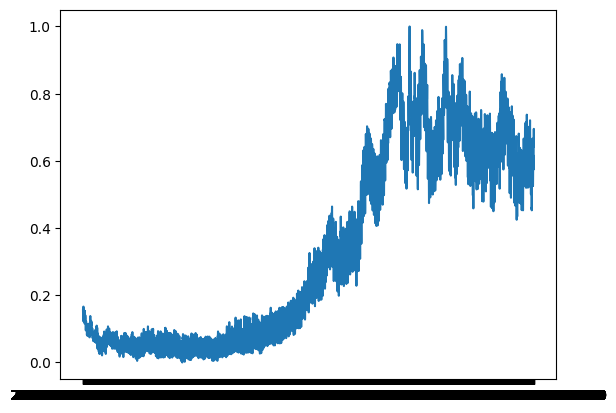

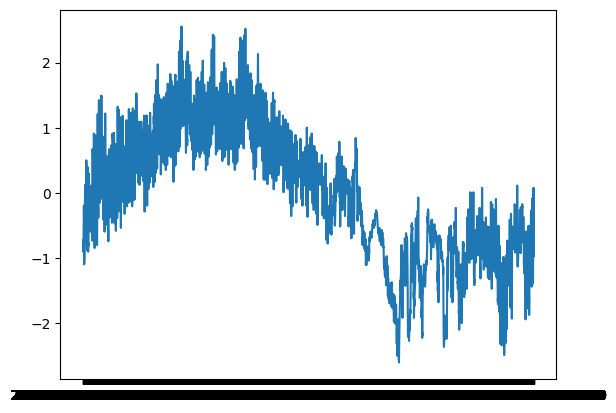

KeyboardInterrupt: 

In [67]:
CONSUMPTION_DFS = [oslo_consumption,stavanger_consumption,trondheim_consumption,tromso_consumption,bergen_consumption]

cols_to_standard_normal = ["temperature","delta_temp"]
cols_to_normalize_01 = ["consumption","spot_price"]

for df in CONSUMPTION_DFS:
    df["delta_temp"] = df["temperature"]-df["temperature"].shift(1)
    df["is_holiday"] = df["is_holiday"].astype(int)
    df["is_weekend"] = df["is_weekend"].astype(int)

    for col in cols_to_standard_normal:
        mu, sig = df[col].mean(), df[col].std()
        df[col] = (df[col]-mu)/sig
    for col in cols_to_normalize_01:
        df[col] = (df[col]-df[col].min())/(df[col].max()-df[col].min())
    df = df.iloc[1:,:]

for df in CONSUMPTION_DFS:
    for col in df.columns:
        plt.plot(df[col])
        plt.show()

<h1>Splitting datasets<h1>

In [64]:
oslo_with_price = oslo_consumption.dropna()
oslo_no_price = pd.concat([oslo_consumption,oslo_with_price]).drop_duplicates(keep=False).drop(columns=["spot_price"])

stavanger_with_price = stavanger_consumption.dropna()
stavanger_no_price = pd.concat([stavanger_consumption,stavanger_with_price]).drop_duplicates(keep=False).drop(columns=["spot_price"])

trondheim_with_price = trondheim_consumption.dropna()
trondheim_no_price = pd.concat([trondheim_consumption,trondheim_with_price]).drop_duplicates(keep=False).drop(columns=["spot_price"])

tromso_with_price = tromso_consumption.dropna()
tromso_no_price = pd.concat([tromso_consumption,tromso_with_price]).drop_duplicates(keep=False).drop(columns=["spot_price"])

bergen_with_price = bergen_consumption.dropna()
bergen_no_price = pd.concat([bergen_consumption,bergen_with_price]).drop_duplicates(keep=False).drop(columns=["spot_price"])

print(oslo_no_price.isna().sum())


consumption    0
temperature    0
is_holiday     0
is_weekend     0
delta_temp     1
dtype: int64
